![example](Data/header.jpg)

# Microsoft Movie Recommendation System

**Author:** 
Neville Ngenzi
***

## Overview

This project aims to build a robust recommendation system for movies by leveraging a diverse dataset encompassing user behaviour and movie characteristics. By analyzing these data points together, we try to identify patterns and relationships between movies and user preferences, resulting in a recommendation system capable of accurately predicting user engagement with specific movies. Further analysis is recommended to refine the system and explore the inclusion of additional data sources, such as social media interactions and user demographics, to further enhance its accuracy and personalization.

***

## Business Problem

Microsoft, lacking film industry expertise and facing financial risk, seeks guidance on prioritizing film genres and subgenres for their new studio. To address this, a data-driven approach will analyze box office trends, film characteristics, and audience demographics to identify profitable opportunities, develop a competitive content strategy, and make informed investment decisions. This will equip Microsoft with the knowledge to prioritize content development, target specific audiences, and allocate resources strategically for optimal success and entry into the competitive film industry.

***

## Data Understanding

This research uses data from several sources, such as box office data, movie attributes, and critical response data, to detect trends and determine what influences the performance of films. A sample of movie releases with both quantitative and categorical factors is represented by the data. To properly comprehend the data and prepare it for efficient analysis, more analysis is required.
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Import standard packages
bomMovie_df = pd.read_csv("data/bom.movie_gross.csv")
bomMovie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# Get the list of all tables in the sql_query
with sqlite3.connect('data/im.db') as conn:
    cur = conn.cursor()
    cur.execute("""
                SELECT name 
                FROM sqlite_master 
                WHERE type='table';
                """)
    tables = cur.fetchall()
    for table in tables:
        print(table)

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)
('im.db',)


In [4]:
conn = sqlite3.connect('data/im.db')
# Read each table into a DataFrame
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_akas_df = pd.read_sql_query("SELECT * FROM movie_akas;", conn)
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
conn.close()
# Merge the tables using the primary key 'movie_id'
merged_df = pd.merge(movie_basics_df, movie_akas_df, how='inner', on='movie_id')
merged_df = pd.merge(merged_df, movie_ratings_df, how='inner', on='movie_id')
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,None,alternative transliteration,0.0,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2,Sunghursh,None,None,original,None,1.0,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,Sunghursh,IN,None,None,None,0.0,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4,Sunghursh,IN,hi,None,alternative transliteration,0.0,7.0,77
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5,Sungharsh,IN,hi,None,alternative spelling,0.0,7.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,2,Sisterleaf,IN,en,None,literal English title,0.0,8.4,600
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,3,Pengalila,IN,None,None,None,0.0,8.4,600
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0,8.4,365
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0,8.4,365


In [5]:
# Merge the im.db and bomMovie_df using the 'title' column as the primary key
movies_df = pd.merge(merged_df, bomMovie_df, how='inner', on='title')
movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,None,None,original,None,1.0,7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",3,Wazir,IN,None,None,None,0.0,7.1,15378,Relbig.,1100000.0,NaN,2016
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",15,On the Road,None,None,original,None,1.0,6.1,37886,IFC,744000.0,8000000,2012
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,2,On the Road,None,None,original,None,1.0,6.0,6,IFC,744000.0,8000000,2012
4,tt5647250,On the Road,On the Road,2016,121.0,Drama,2,On the Road,GB,None,None,None,0.0,5.7,127,IFC,744000.0,8000000,2012


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10624 entries, 0 to 10623
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           10624 non-null  object 
 1   primary_title      10624 non-null  object 
 2   original_title     10624 non-null  object 
 3   start_year         10624 non-null  int64  
 4   runtime_minutes    10567 non-null  float64
 5   genres             10616 non-null  object 
 6   ordering           10624 non-null  int64  
 7   title              10624 non-null  object 
 8   region             8314 non-null   object 
 9   language           1759 non-null   object 
 10  types              8152 non-null   object 
 11  attributes         349 non-null    object 
 12  is_original_title  10624 non-null  float64
 13  averagerating      10624 non-null  float64
 14  numvotes           10624 non-null  int64  
 15  studio             10616 non-null  object 
 16  domestic_gross     105

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***

The data preparation process involves importing the pandas library and converting a dictionary of data into a DataFrame. The data is then explored and analyzed, obtaining descriptive statistics and checking for duplicates. Data cleaning is performed to handle missing values and outliers, and to address any inconsistencies or errors. 


Selected some specific columns from the DataFrame 'movies_df' for easier analysis.

In [7]:
# Relevant columns
movies_df = movies_df[['movie_id', 'title', 'genres', 'averagerating', 'domestic_gross', 'foreign_gross', 'numvotes', 'year', 'studio']]
movies_df

,movie_id,title,genres,averagerating,domestic_gross,foreign_gross,numvotes,year,studio
0,tt0315642,Wazir,"Action,Crime,Drama",7.1,1100000.0,NaN,15378,2016,Relbig.
1,tt0315642,Wazir,"Action,Crime,Drama",7.1,1100000.0,NaN,15378,2016,Relbig.
2,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,744000.0,8000000,37886,2012,IFC
3,tt4339118,On the Road,Drama,6.0,744000.0,8000000,6,2012,IFC
4,tt5647250,On the Road,Drama,5.7,744000.0,8000000,127,2012,IFC
...,...,...,...,...,...,...,...,...,...
10619,tt8549902,Oolong Courtyard,Comedy,4.6,37700.0,NaN,61,2018,CL
10620,tt9078374,Last Letter,"Drama,Romance",6.4,181000.0,NaN,322,2018,CL
10621,tt9151704,Burn the Stage: The Movie,"Documentary,Music",8.8,4200000.0,16100000,2067,2018,Trafalgar
10622,tt9151704,Burn the Stage: The Movie,"Documentary,Music",8.8,4200000.0,16100000,2067,2018,Trafalgar


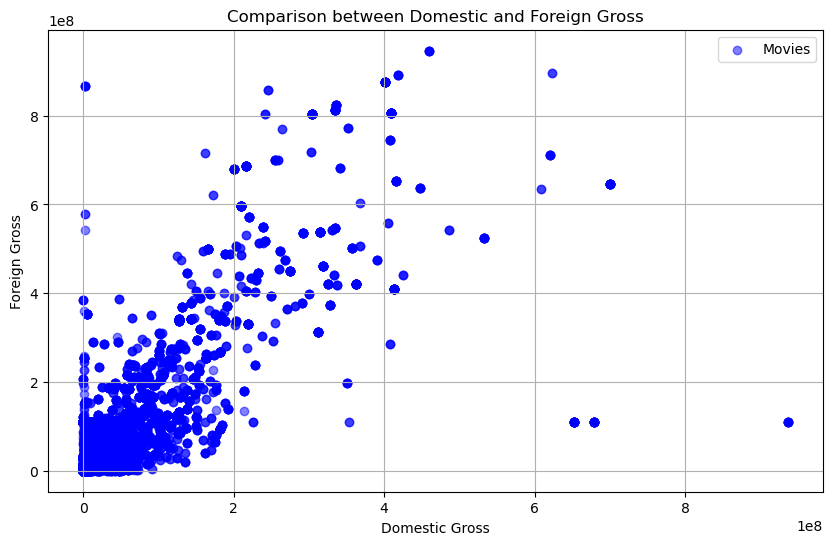

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'movies_df'
# Drop rows with NaN values in 'domestic_gross' or 'foreign_gross'
movies_df_cleaned = movies_df.dropna(subset=['domestic_gross', 'foreign_gross'])

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for domestic vs foreign gross with different shapes
plt.scatter(movies_df_cleaned['domestic_gross'], movies_df_cleaned['foreign_gross'], color='blue', alpha=0.5, label='Movies', marker='o')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Comparison between Domestic and Foreign Gross')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


The scatter plot comparing domestic and foreign gross can provide several insights into the relationship between these two variables for the movies in your dataset:

Distribution of Movies:

The plot shows the distribution of movies based on both domestic and foreign gross. You can observe how the data points are scattered across the plot, indicating the range and concentration of movies in different gross categories.
Correlation:

Evaluate the overall trend and correlation between domestic and foreign gross. A positive correlation suggests that as one variable increases, the other tends to increase as well.
Outliers:

Identify outliers or extreme values that deviate significantly from the general trend. These outliers may represent movies that performed exceptionally well (or poorly) in one market compared to the other.
Concentration Areas:

Look for concentration areas where data points are densely clustered. This could indicate a range of gross values where most movies fall, providing insights into the typical performance of movies in both markets.
Relative Performance:

Compare the density of data points in different regions of the plot to assess how movies generally perform in domestic versus foreign markets. Are there more points in one region than the other?
Market Preference:

Observe if there is a particular trend or pattern that suggests a preference for certain types of movies in either the domestic or foreign market. For example, certain genres or themes may resonate more strongly in specific regions.
Marketing and Distribution Strategies:

Consider the implications for marketing and distribution strategies. Insights from the plot can inform decisions about how to tailor promotional efforts or distribution channels for different markets.
Successful Movies:

Identify movies that fall in the upper-right quadrant of the plot, indicating high performance in both domestic and foreign markets. These movies may serve as examples of successful global releases.
Potential Growth Areas:

Explore areas of the plot with lower density to identify potential growth areas. Movies that performed well in one market but not the other may present opportunities for targeted marketing or distribution strategies.
Historical Trends:

Analyze how the distribution of data points has evolved over time. Are there shifts in the relationship between domestic and foreign gross in recent years? This information can guide future strategies based on evolving market dynamics.

We are going to do a data wuality check where we will need to identify missing values. In occurence of high numbers of miing values in specific columns, we may indicate data collection issues or areas where data imputation or cleaning is necessary.

In [9]:
# Calculate the count of missing values for each column in the 'movies_df' DataFrame
missing_values_per_column = movies_df.isnull().sum()
print('\nMissing values per column:')
print(missing_values_per_column)


Missing values per column:
movie_id             0
title                0
genres               8
averagerating        0
domestic_gross      63
foreign_gross     3431
numvotes             0
year                 0
studio               8
dtype: int64


In [10]:
# Convert 'foreign_gross' and 'domestic_gross' to integers after replacing NaN with 0
movies_df['foreign_gross'] = pd.to_numeric(movies_df['foreign_gross'], errors='coerce')
movies_df['domestic_gross'] = pd.to_numeric(movies_df['domestic_gross'], errors='coerce')

# Fill NaN values with mean
movies_df['domestic_gross'].fillna(movies_df['domestic_gross'].mean(), inplace=True)
movies_df['foreign_gross'].fillna(movies_df['foreign_gross'].mean(), inplace=True)
pd.set_option('display.float_format', '{:.0f}'.format)

# Display the DataFrame
movies_df

,movie_id,title,genres,averagerating,domestic_gross,foreign_gross,numvotes,year,studio
0,tt0315642,Wazir,"Action,Crime,Drama",7,1100000,110272315,15378,2016,Relbig.
1,tt0315642,Wazir,"Action,Crime,Drama",7,1100000,110272315,15378,2016,Relbig.
2,tt0337692,On the Road,"Adventure,Drama,Romance",6,744000,8000000,37886,2012,IFC
3,tt4339118,On the Road,Drama,6,744000,8000000,6,2012,IFC
4,tt5647250,On the Road,Drama,6,744000,8000000,127,2012,IFC
...,...,...,...,...,...,...,...,...,...
10619,tt8549902,Oolong Courtyard,Comedy,5,37700,110272315,61,2018,CL
10620,tt9078374,Last Letter,"Drama,Romance",6,181000,110272315,322,2018,CL
10621,tt9151704,Burn the Stage: The Movie,"Documentary,Music",9,4200000,16100000,2067,2018,Trafalgar
10622,tt9151704,Burn the Stage: The Movie,"Documentary,Music",9,4200000,16100000,2067,2018,Trafalgar


In [11]:
# Remove duplicates rows based on the 'title' column
movies_df_nodup = movies_df.drop_duplicates(subset='title', keep='first')
movies_df_nodup 

,movie_id,title,genres,averagerating,domestic_gross,foreign_gross,numvotes,year,studio
0,tt0315642,Wazir,"Action,Crime,Drama",7,1100000,110272315,15378,2016,Relbig.
2,tt0337692,On the Road,"Adventure,Drama,Romance",6,744000,8000000,37886,2012,IFC
6,tt0339736,Whiplash,Horror,6,13100000,35900000,2420,2014,SPC
17,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7,58200000,129900000,275300,2013,Fox
19,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6,26300000,26900000,105116,2014,Uni.
...,...,...,...,...,...,...,...,...,...
10615,tt8404272,How Long Will I Love U,Romance,6,747000,82100000,607,2018,WGUSA
10616,tt8427036,Helicopter Eela,Drama,5,72000,110272315,673,2018,Eros
10618,tt8549902,Oolong Courtyard,Comedy,5,37700,110272315,61,2018,CL
10620,tt9078374,Last Letter,"Drama,Romance",6,181000,110272315,322,2018,CL


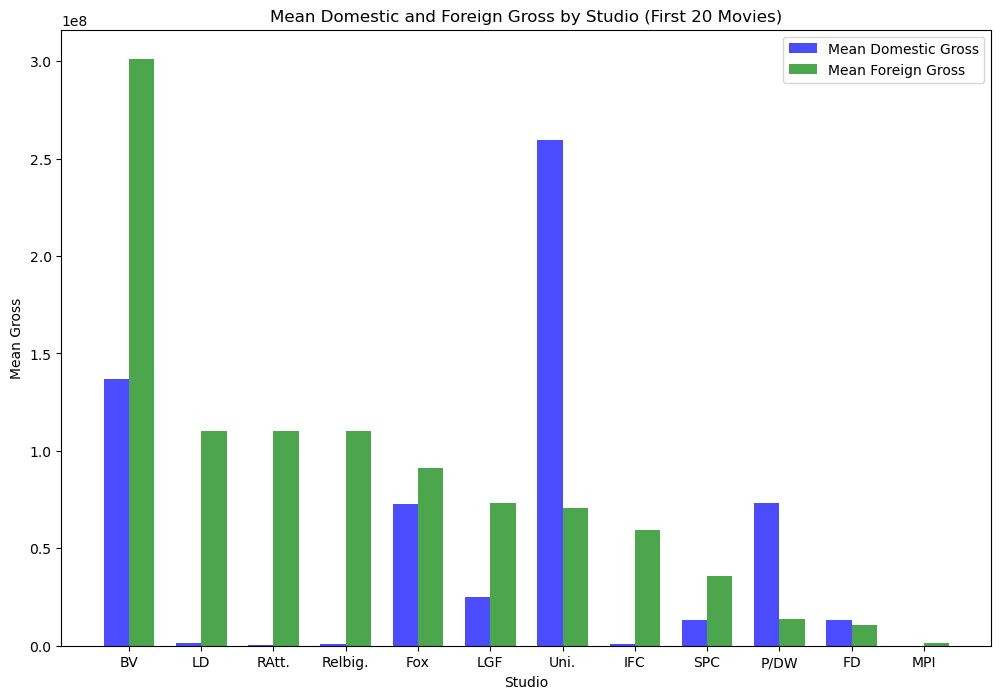

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
# Select the first 20 movies
movies_df_first_20 = movies_df_nodup.head(20)

# Drop rows with NaN values in 'domestic_gross' or 'foreign_gross'
movies_df_cleaned = movies_df_first_20.dropna(subset=['domestic_gross', 'foreign_gross'])

# Group data by studio and calculate the mean of domestic and foreign gross for each studio
studio_gross_mean = movies_df_cleaned.groupby('studio').agg({'domestic_gross': 'mean', 'foreign_gross': 'mean'}).reset_index()

# Sort the DataFrame by mean foreign gross in descending order
studio_gross_mean_sorted = studio_gross_mean.sort_values(by='foreign_gross', ascending=False)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(studio_gross_mean_sorted))

plt.bar(index, studio_gross_mean_sorted['domestic_gross'], bar_width, label='Mean Domestic Gross', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], studio_gross_mean_sorted['foreign_gross'], bar_width, label='Mean Foreign Gross', color='g', alpha=0.7)

plt.xlabel('Studio')
plt.ylabel('Mean Gross')
plt.title('Mean Domestic and Foreign Gross by Studio (First 20 Movies)')
plt.xticks([i + bar_width/2 for i in index], studio_gross_mean_sorted['studio'])
plt.legend()
plt.show()


Analyzing the grouped bar chart comparing mean domestic and foreign gross for studios based on the first 20 movies provides several insights:

Studio Performance:

Identify studios that, on average, have higher mean foreign gross compared to domestic gross (and vice versa). This highlights studios that may be more successful in specific international markets.
Market Preferences:

Examine whether certain studios have a stronger presence in either the domestic or foreign market. This information can guide studios in tailoring their content or marketing strategies based on market preferences.
Overall Studio Rankings:

Evaluate the overall ranking of studios based on mean gross performance. Studios with higher combined mean gross may indicate a broader and more successful global presence.
Opportunities for Improvement:

Identify studios with lower mean gross values in either domestic or foreign markets. This can highlight areas where studios may have opportunities for improvement or targeted strategies.
Market Dynamics:

Explore whether certain studios are better positioned to leverage specific market dynamics. For example, some studios may excel in capturing international audiences due to their content or marketing strategies.
Content Preferences:

Analyze whether certain genres or types of content perform better for specific studios in domestic or foreign markets. This information can help studios tailor their content creation strategies.
Global Appeal:

Recognize studios that have a strong global appeal, as indicated by higher mean foreign gross values. This can be valuable information for studios aiming to produce content with broad international appeal.
Strategic Decision-Making:

Use the insights to inform strategic decision-making for studios, such as adjusting content strategies, marketing campaigns, or distribution approaches based on the observed market dynamics.
Competitive Landscape:

Understand the competitive landscape by comparing the mean gross performance of different studios. This information can be valuable for studios looking to position themselves effectively in the industry.
Trends Over Time:

If applicable, analyze how the mean gross performance of studios has evolved over time. This may reveal trends in studio performance and market dynamics.
Remember that these insights are based on mean gross values and should be considered alongside other relevant factors. Additionally, further analysis and exploration may be required to gain a deeper understanding of the factors influencing studio performance.

***

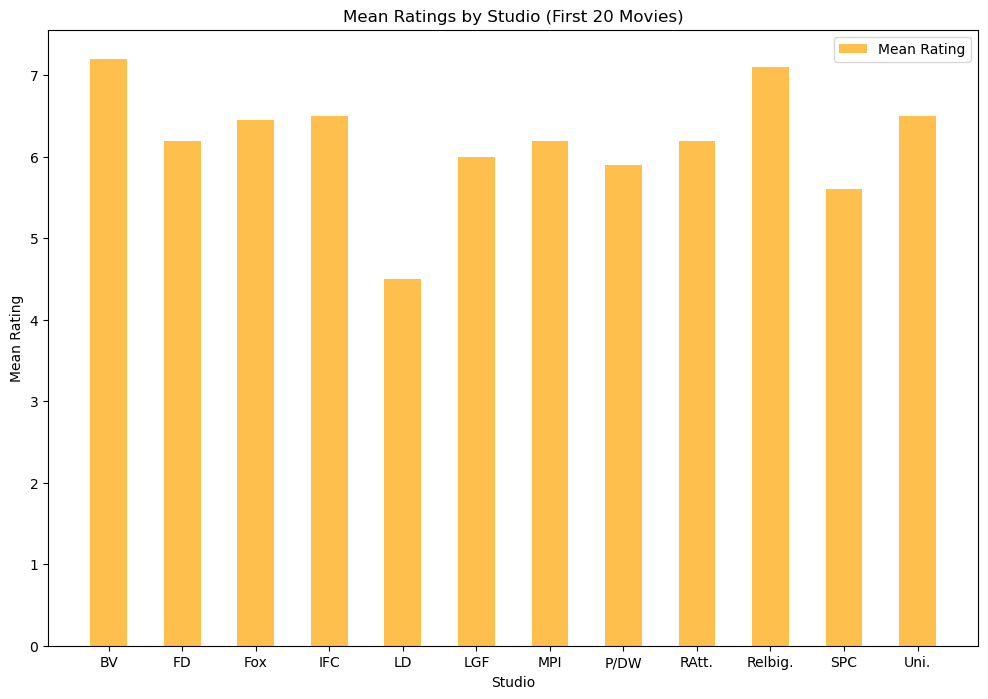

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
# Select the first 20 movies
movies_df_first_20 = movies_df_nodup.head(20)

# Drop rows with NaN values in 'averagerating'
movies_df_cleaned = movies_df_first_20.dropna(subset=['averagerating'])

# Group data by studio and calculate the mean of domestic and foreign ratings for each studio
studio_rating_mean = movies_df_cleaned.groupby('studio').agg({'averagerating': 'mean'}).reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.5
index = range(len(studio_rating_mean))

plt.bar(index, studio_rating_mean['averagerating'], bar_width, label='Mean Rating', color='orange', alpha=0.7)

plt.xlabel('Studio')
plt.ylabel('Mean Rating')
plt.title('Mean Ratings by Studio (First 20 Movies)')
plt.xticks(index, studio_rating_mean['studio'])
plt.legend()
plt.show()


We are going to perform several operations on the 'movies_df' DataFrame, creating a new column for total gross, calculating the average ratings and total gross, then group them on 'title', and reorder the columns.

In [12]:
# Create a new column for total gross
movies_df['total_gross'] = movies_df['domestic_gross'] + movies_df['foreign_gross']
# Convert 'total_gross' to integer
movies_df['total_gross'] = movies_df['total_gross'].astype('int')
# Step 3: Calculate average rating and total gross by grouping on 'title'
average_ratings_df = movies_df.groupby('title').agg({
    'averagerating': 'mean',
    'total_gross': 'sum',
    'movie_id': 'first',
    'genres': 'first'
}).reset_index()

# Reorder the columns
column_order = ['movie_id', 'title', 'genres', 'averagerating', 'movie_id', 'total_gross']
average_ratings_df = average_ratings_df[column_order]

# Display the resulting DataFrame with average rating, total gross, and other columns
average_ratings_df

,movie_id,title,genres,averagerating,movie_id,total_gross
0,tt2614684,'71,"Action,Drama,Thriller",7,tt2614684,14895000
1,tt2353767,"1,000 Times Good Night","Drama,War",7,tt2353767,110326215
2,tt1179933,10 Cloverfield Lane,"Drama,Horror,Mystery",7,tt1179933,551000000
3,tt1715873,10 Years,"Comedy,Drama,Romance",6,tt1715873,331425945
4,tt3346824,1001 Grams,Drama,6,tt3346824,110283315
...,...,...,...,...,...,...
2730,tt2784512,Zombeavers,"Action,Adventure,Comedy",5,tt2784512,330861645
2731,tt1222817,Zookeeper,"Comedy,Family,Romance",5,tt1222817,509700000
2732,tt1608290,Zoolander 2,Comedy,5,tt1608290,623700000
2733,tt2948356,Zootopia,"Adventure,Animation,Comedy",8,tt2948356,5119000000


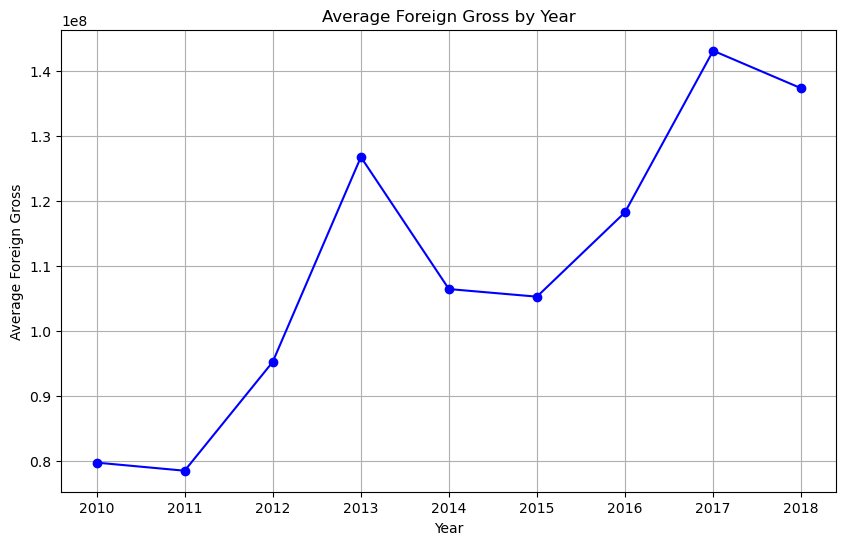

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
# Convert 'year' to datetime for proper sorting
movies_df['year'] = pd.to_datetime(movies_df['year'], format='%Y')

# Group data by year and calculate the mean foreign gross for each year
avg_foreign_gross_by_year = movies_df.groupby('year')['foreign_gross'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_foreign_gross_by_year['year'], avg_foreign_gross_by_year['foreign_gross'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Foreign Gross')
plt.title('Average Foreign Gross by Year')
plt.grid(True)
plt.show()


* Check for any seasonal patterns that might influence average foreign gross. This information can be valuable for scheduling movie releases or marketing campaigns during specific times of the year.
Content and Genre Analysis:


* Consider external factors such as changes in the global film industry, economic conditions, or geopolitical events that might have influenced foreign gross. Understanding market dynamics is crucial for strategic planning.
Investment Decisions:

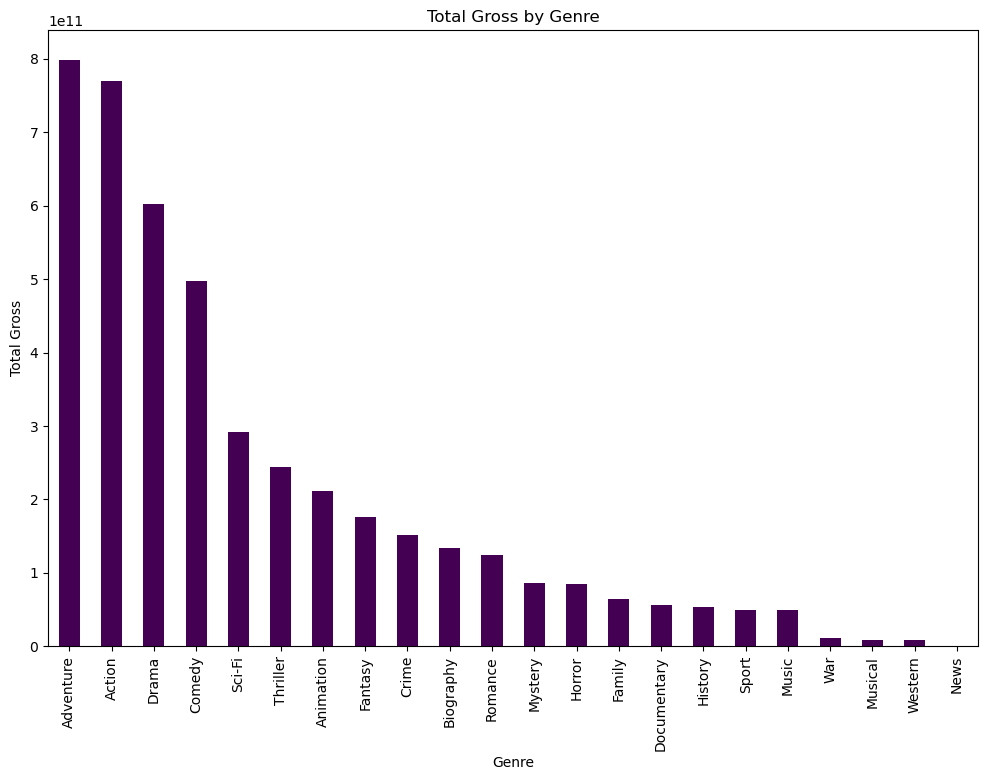

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# Select relevant columns
genre_gross_data = average_ratings_df[['genres', 'total_gross']].copy()  # Use copy() to create a copy of the DataFrame

# Split the 'genres' column into a list of genres
genre_gross_data['genres'] = genre_gross_data['genres'].apply(lambda x: x.split(','))

# Create a new DataFrame with one row for each genre and its corresponding total gross
genre_df = pd.DataFrame([(genre, gross) for genres, gross in zip(genre_gross_data['genres'], genre_gross_data['total_gross']) for genre in genres],
                        columns=['genre', 'total_gross'])

# Group by genre and sum the total gross
genre_totals = genre_df.groupby('genre')['total_gross'].sum().sort_values(ascending=False)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
genre_totals.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.title('Total Gross by Genre')
plt.show()


Analyzing the stacked bar chart showing the total gross by genre can provide several insights that could be valuable for a movie recommendation system. Here are some potential insights:

Top-Grossing Genres:

Identify the genres that contribute the most to total gross. These genres might be popular among the audience and could be prioritized in the movie recommendation system.
Diversification of Revenue:

Examine how revenue is distributed across different genres. A diverse set of genres contributing to high total gross could suggest that Microsoft's movie recommendation system should offer a broad range of genres to cater to various audience preferences.
Genre Combinations:

Explore which combinations of genres tend to perform well. For instance, the chart might reveal that movies with a combination of "Action" and "Adventure" have higher total gross.
Underperforming Genres:

Identify genres that contribute less to total gross. While not every movie needs to be a blockbuster, understanding the performance of different genres can help in making strategic decisions.
Seasonal Trends:

Analyze whether certain genres perform better in specific years or seasons. This could inform content planning based on temporal trends.
Recommendation Personalization:

Consider personalizing recommendations based on a user's historical preference for specific genres. If certain genres consistently contribute to higher total gross, the recommendation system can prioritize those genres for users who have shown a preference for them.
Market Trends:

Stay aware of changing market trends by monitoring shifts in genre popularity over time. This information can be valuable for adapting the recommendation system to evolving audience preferences.

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [15]:
# Here you run your code to model the data

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***